In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
ws = 1
def data_loader(fname):

    data = np.loadtxt(fname, skiprows=1, dtype='float')

    energy =  data[:,0]#data[int(ws/2)-1:int(-1*ws/2),0]

    pdos = []
    arr_up = data[:,1]
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos.append(avg)
        i += 1

    return energy, pdos
c = 0

# make plots
fig = plt.figure(figsize=(16, 8))

for i in [0]:
    c += 1
    i = str(i)
    energy, pdos_Zn_3d = data_loader(f'Zn_3d.pdos')
    _, pdos_tot = data_loader(f'ZnS_hub.pdos_tot')
    
    fermi = 5.5452
    # create subplots
    ax = fig.add_subplot(2, 4, c)

    # plot data
    ax.plot(energy - fermi, pdos_Zn_3d, linewidth=0.75, color='r', label='Zn-3d')
    ax.plot(energy - fermi, pdos_tot, linewidth=0.75, color='k', label='total')
    ax.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    ax.fill_between(energy - fermi, 0, pdos_Zn_3d, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_tot, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    if i=="2":
        ax.legend(frameon=False, fontsize=20)
    if i=="2" or i=="6":
        ax.set_ylabel('DOS (arb. unit)', fontsize=20)
        ax.set_yticks(np.arange(0, 301, 50))
        ax.set_yticklabels(labels=np.arange(0, 301, 50), fontsize=12)
    else:
        ax.set_yticks([])
    if int(i) > 5:
        ax.set_xlabel('Energy (eV)', fontsize=20)
        ax.set_xticks(np.arange(-13,6,4))
        ax.set_xticklabels(labels=np.arange(-13,6,4), fontsize=15)
    else:
        ax.set_xticks([])
    ax.set_title(f"U={i}", fontsize=20)
    ax.set_ylim(0,300)
    ax.set_xlim(-13.2, 6)

# adjust subplot layout
plt.subplots_adjust(hspace=0.4)

# set the overall title
#plt.suptitle(r"$d$-band positions of Zn-$3d$ in ZnS for different Hubbard U parameters")
plt.tight_layout()
# show the plot
plt.show()

NameError: name 'pdos_tot_up' is not defined

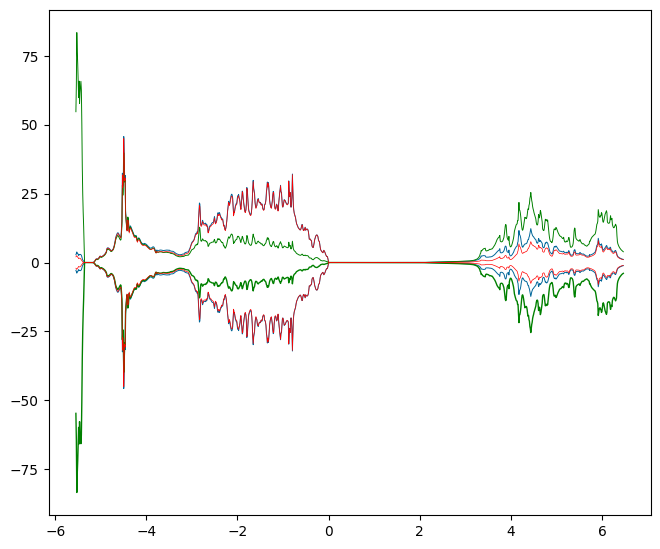

In [2]:
plot_pdos()